In [19]:
# Needed for functions
import numpy as np
import time
from qiskit import IBMQ
from copy import deepcopy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

from qiskit.extensions import Initialize
# from qiskit_textbook.tools import random_state
from qiskit.quantum_info import partial_trace, Statevector

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

import matplotlib.pyplot as plt

# Import Qiskit classes
import qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.providers.aer import noise
from qiskit.compiler import assemble

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

# Auxiliary methods
from qiskit.quantum_info import Choi, Kraus
from qiskit.extensions import HGate, XGate

from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere


from qiskit.quantum_info import state_fidelity
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [20]:
IBMQ.save_account('3319e2195d42fee60327b083d128586f885e309334357e4527989396ab2790c9805356dd3eff61daaa55812ac09d4af19021bf29a6acce19b8c141b96422db7e', overwrite=True)

In [23]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')

ibmqfactory.load_account:WARNING:2021-07-07 21:59:08,759: Credentials are already in use. The existing account in the session will be replaced.


In [25]:
# Create the expected statevector
q2 = QuantumRegister(2)
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])
print(bell)

target_state_bell = qi.Statevector.from_instruction(bell)
print(target_state_bell)

      ┌───┐     
q1_0: ┤ H ├──■──
      └───┘┌─┴─┐
q1_1: ─────┤ X ├
           └───┘
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


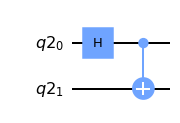

In [26]:
# Create the actual circuit
q2 = QuantumRegister(2)
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])
bell.draw('mpl')

In [ ]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_bell = state_tomography_circuits(bell, [q2[0], q2[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

In [14]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.99742


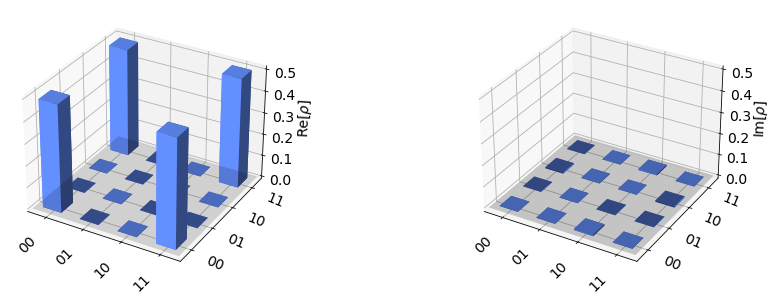

In [15]:
plot_state_city(rho_fit_bell)

In [30]:

# job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_bell, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
# exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_fit_bell = tomo_swap.fit()
F_bell = state_fidelity(rho_fit_bell, target_state_bell)
print('Fit Fidelity =', F_bell)


Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.9191481999974147


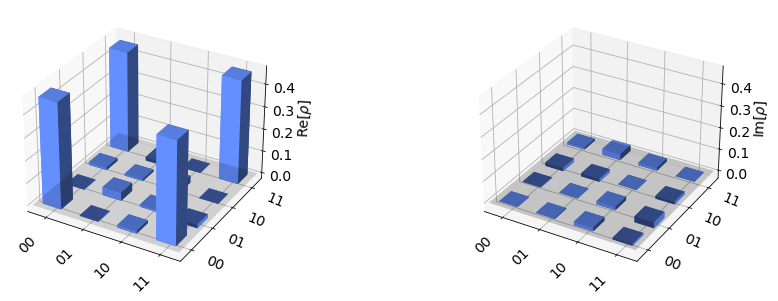

In [31]:
plot_state_city(rho_fit_bell)

      ┌───┐          
q3_0: ┤ H ├──■───────
      └───┘┌─┴─┐     
q3_1: ─────┤ X ├──■──
           └───┘┌─┴─┐
q3_2: ──────────┤ X ├
                └───┘
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


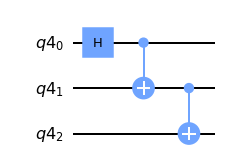

In [33]:
# Create the expected statevector
q3 = QuantumRegister(3)
ghz = QuantumCircuit(q3)
ghz.h(q3[0])
ghz.cx(q3[0], q3[1])
ghz.cx(q3[1], q3[2])
print(ghz)

target_state_ghz = qi.Statevector.from_instruction(ghz)
print(target_state_ghz)

# Create the actual circuit
q3 = QuantumRegister(3)
ghz = QuantumCircuit(q3)
ghz.h(q3[0])
ghz.cx(q3[0], q3[1])
ghz.cx(q3[1], q3[2])
ghz.draw('mpl')

In [34]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_ghz = state_tomography_circuits(ghz, [q3[0], q3[1], q3[2]])

# Execute
job = qiskit.execute(qst_ghz, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
tomo_fitter_ghz = StateTomographyFitter(job.result(), qst_ghz)

Time taken: 1.0526421070098877


State Fidelity: F = 0.99312


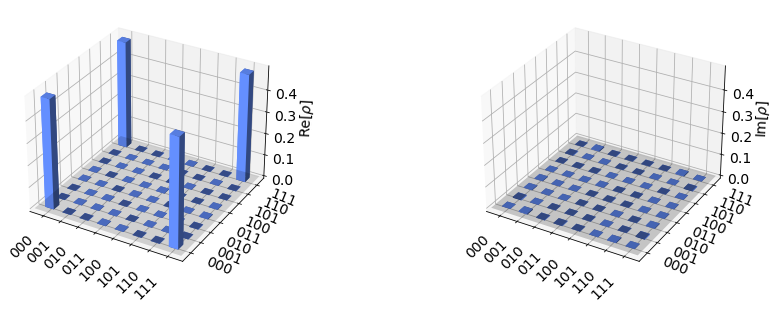

In [25]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_ghz = tomo_fitter_ghz.fit(method='lstsq')
F_ghz = qi.state_fidelity(rho_fit_ghz, target_state_ghz)
print('State Fidelity: F = {:.5f}'.format(F_ghz))
plot_state_city(rho_fit_ghz)

Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.8336693788861127


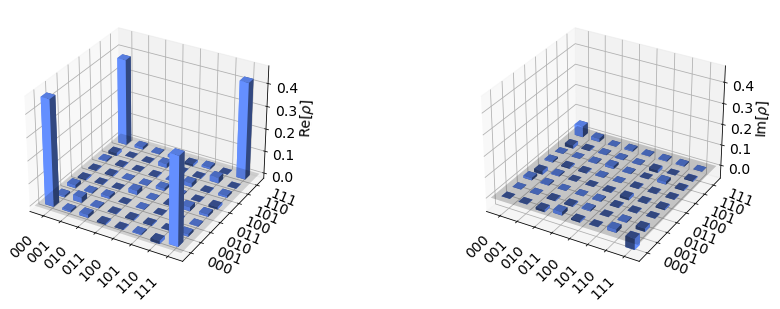

In [35]:

# job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_ghz, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
# exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_fit_ghz = tomo_swap.fit()
F_ghz = state_fidelity(rho_fit_ghz, target_state_ghz)
print('Fit Fidelity =', F_ghz)
plot_state_city(rho_fit_ghz)


      ┌────────────┐               ┌───┐
q5_0: ┤ RY(1.9106) ├──■─────────■──┤ X ├
      └────────────┘┌─┴─┐     ┌─┴─┐└───┘
q5_1: ──────────────┤ H ├──■──┤ X ├─────
                    └───┘┌─┴─┐└───┘     
q5_2: ───────────────────┤ X ├──────────
                         └───┘          
Statevector([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.57735027+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


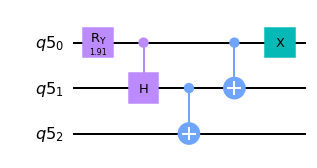

In [36]:
# Create the expected statevector
q3 = QuantumRegister(3)
phi = 2*np.arccos(1/np.sqrt(3))
w = QuantumCircuit(q3)
w.ry(phi, q3[0])
w.ch(q3[0], q3[1])
w.cx(q3[1], q3[2])
w.cx(q3[0], q3[1])
w.x(q3[0])
print(w)

target_state_w = qi.Statevector.from_instruction(w)
print(target_state_w)

# Create the actual circuit
w = QuantumCircuit(q3)
w.ry(phi, q3[0])
w.ch(q3[0], q3[1])
w.cx(q3[1], q3[2])
w.cx(q3[0], q3[1])
w.x(q3[0])
w.draw('mpl')

In [37]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_w = state_tomography_circuits(w, [q3[0], q3[1], q3[2]])

# Execute
job = qiskit.execute(qst_w, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
tomo_fitter_w = StateTomographyFitter(job.result(), qst_w)

Time taken: 1.2626879215240479


State Fidelity: F = 0.99704


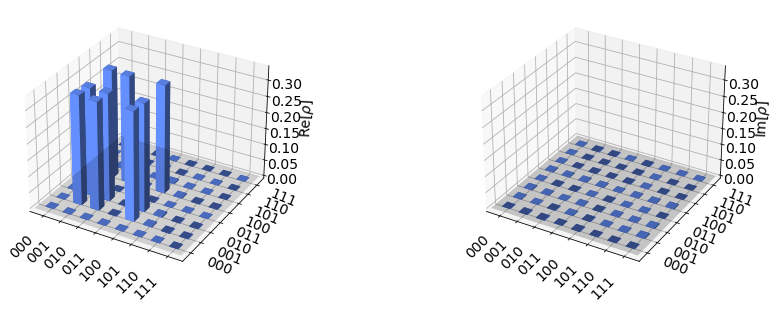

In [35]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_w = tomo_fitter_w.fit(method='lstsq')
F_w = qi.state_fidelity(rho_fit_w, target_state_w)
print('State Fidelity: F = {:.5f}'.format(F_w))
plot_state_city(rho_fit_w)

Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.8643483629638317


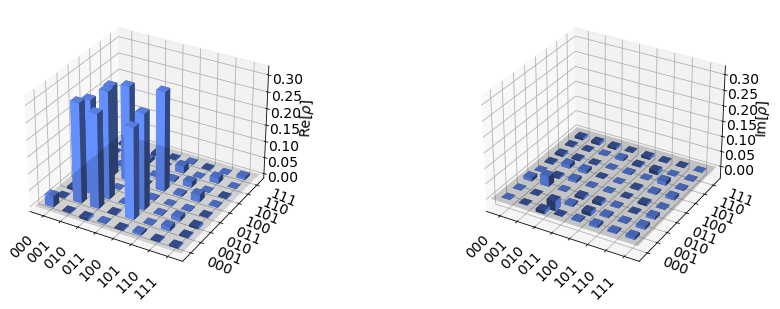

In [38]:

# job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_w, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
# exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_fit_w = tomo_swap.fit()
F_w = state_fidelity(rho_fit_w, target_state_w)
print('Fit Fidelity =', F_w)
plot_state_city(rho_fit_w)

